In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\\Users\\elitebook 840\\Desktop\\airline-passengers.txt')

In [3]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
#Dataframe datatypes
data.dtypes

Month         object
Passengers     int64
dtype: object

In [5]:
#checking the null values before building a report 
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
#to convert column to datetime
data["Month"] = pd.to_datetime(data["Month"])
data.set_index("Month", inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Passengers')

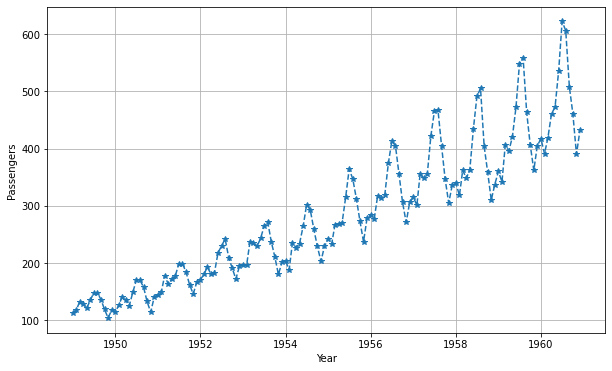

In [7]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data.Passengers, '--', marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [8]:
#check for missing values 
data.isnull().values.any()
#There are no missing values in our dataset however, in bid to explain how we handle missing values.

False

In [9]:
data_copy = data.copy()

In [10]:
rows = data_copy.sample(frac=0.1, random_state=0)
rows['Passengers'] = np.nan
data_copy.loc[rows.index,'Passengers'] = rows['Passengers']
#assigning th random sample numbers picked to their index location to be the values in the passengers column to fill np.nan
data_copy.isnull().sum()
#There are now 14 missing values in the dataset

Passengers    14
dtype: int64

In [11]:
#filling missing data by imputation - forward fill
data_copy_ffill =data_copy.fillna(method='ffill')
data_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

In [12]:
#filling missing data by imputation - backward fill
data_copy_bfill = data_copy.fillna(method='bfill')
data_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [13]:
#filling the missing values by interpolation - forward fill
data_copy_LIF = data_copy.interpolate(method='linear', limit_direction='forward')
data_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [14]:
#filling the missing values by interpolation - backward fill
data_copy_LIB = data_copy.interpolate(method='linear', limit_direction='backward')
data_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

Downsampling and Upsampling


In [16]:
#Downsampling to quartely data
data_quartely = data.resample('3M').mean()

Text(0, 0.5, 'Passengers')

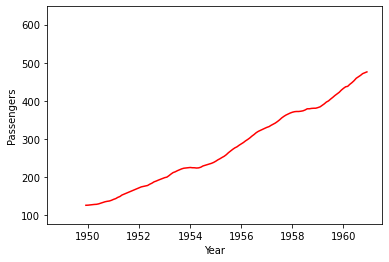

In [17]:
#Upsampling to daily data points
data_daily = data.resample('D').mean()

plt.plot(data_daily.index, data_daily.Passengers, '-')
plt.plot(data.rolling(12).mean(), color='red')
plt.xlabel('Year')
plt.ylabel('Passengers')

Text(0, 0.5, 'Passengers')

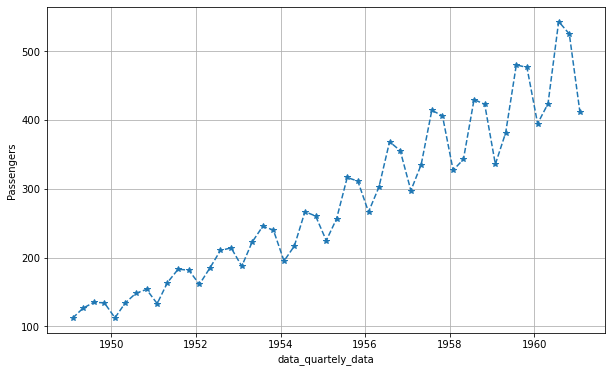

In [18]:
plt.figure(figsize=(10,6))
plt.plot(data_quartely.index, data_quartely.Passengers, '--', marker='*',)
plt.grid()
plt.xlabel('data_quartely_data')
plt.ylabel('Passengers')

Text(0, 0.5, 'Passengers')

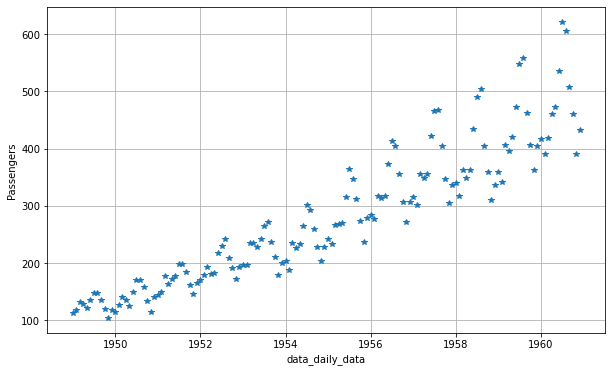

In [19]:
plt.figure(figsize=(10,6))
plt.plot(data_daily.index, data_daily.Passengers, '--', marker='*',)
plt.grid()
plt.xlabel('data_daily_data')
plt.ylabel('Passengers')

Text(0, 0.5, 'Passengers')

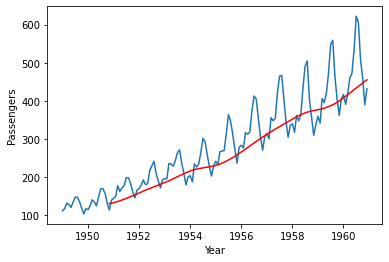

In [20]:
data_MA = data.copy()
MA = data_MA['Passengers'].rolling(12).mean()
plt.plot(data.index, data.Passengers, '-')
plt.plot(MA.rolling(12).mean(), color='red')
plt.xlabel('Year')
plt.ylabel('Passengers')

Time Series Specific Explanatory Model

In [21]:
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

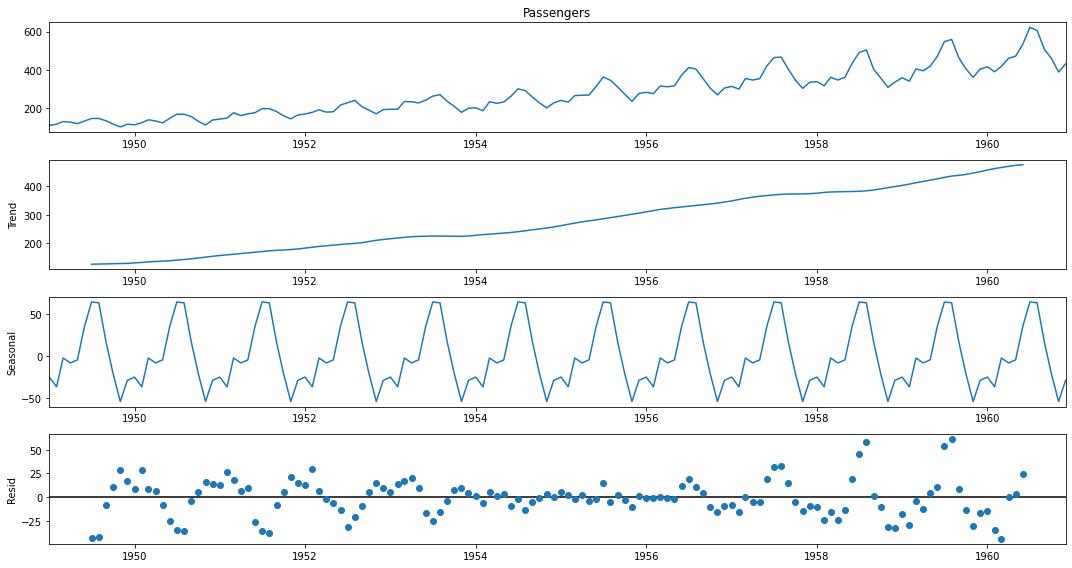

In [22]:
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(data['Passengers'], model='additive')
decompose_series.plot()
plt.show()

The decomposed time series show an obvious increasing trend and seasonality variations. Recall that we have initially plotted the moving average on the last 12 months which showed that it varies with time. This suggests that the data is not stationary. we will now perform an ADF test to confirm this speculation.

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
adf_result = adfuller(data['Passengers'])
print(f'ADF Statistics: {adf_result[0]}')
print(f'p_value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used {adf_result[3]}')
print(f'Critical_values:')
for k, v in adf_result[4].items():
    print(f' {k} : {v}')

ADF Statistics: 0.8153688792060423
p_value: 0.9918802434376409
No. of lags used: 13
No. of observations used 130
Critical_values:
 1% : -3.4816817173418295
 5% : -2.8840418343195267
 10% : -2.578770059171598


From the results obtained, the p-value is greater than the critical value at a 5% sig. level and, the ADF statistic is greater that any of the critical values obtain. This confirms that the series is indeed non-stationary.

Text(0, 0.5, 'Passengers')

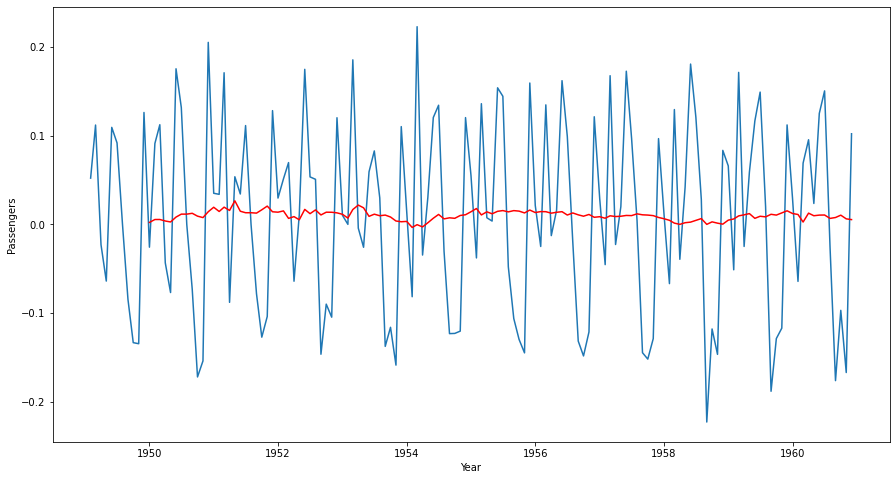

In [25]:
#Convert time series to statioary by removing trend and seasonality through log transformation and differencing
data_log = np.log(data)
data_diff = data_log.diff(periods=1)
plt.plot(data_diff.index, data_diff.Passengers, '-')
plt.plot(data_diff.rolling(12).mean(), color='red')
plt.xlabel('Year')
plt.ylabel('Passengers')

In [26]:
data_diff = data_diff.fillna(method='bfill')

In [27]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

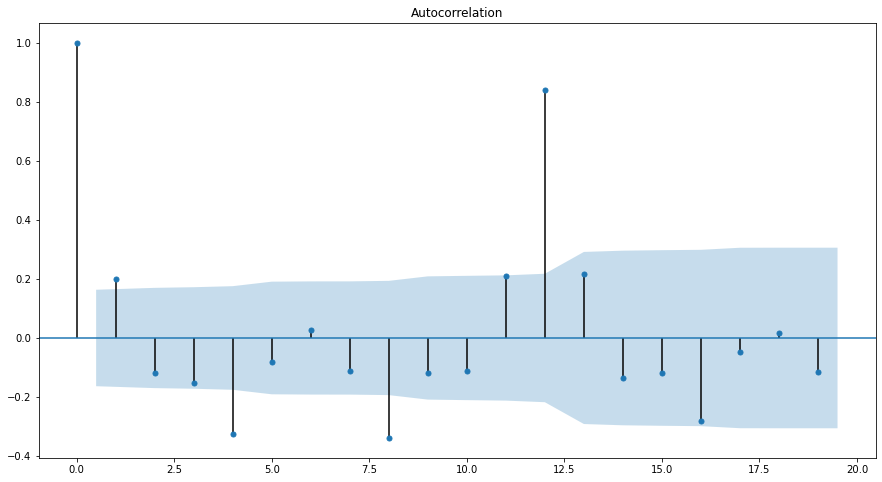

In [28]:
#ACF
acf_plot = plot_acf(data_diff, lags = range(0, 20))
plt.show()

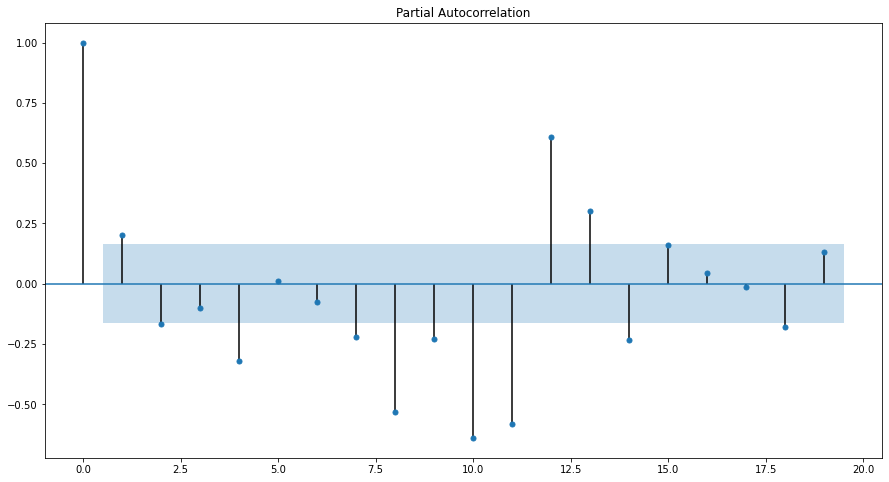

In [29]:
pacf_plot = plot_pacf(data_diff, lags = range(0, 20))
plt.show()

The shaded regions in the plots are the confidence intervals. The lags where the PACF and ACF charts cross this region are the values for p and q. In both plots, p=q=1.

In the ACF plot, there is one lag that crosses the significance level hence, q=1. Similarly in the PACF plot, p=2.

C:\Users\elitebook 840\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


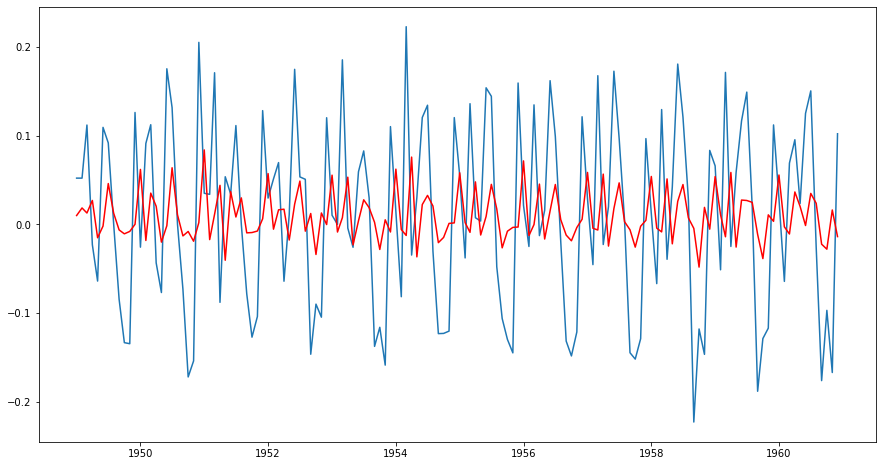

In [30]:
#AR, MA and ARIMA

from statsmodels.tsa.arima_model import ARIMA
#(p,d,q)
AR_model = ARIMA(data_diff, order=(2,0,0))
AR_model_results = AR_model.fit()
plt.plot(data_diff)
plt.plot(AR_model_results.fittedvalues, color='red')

C:\Users\elitebook 840\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


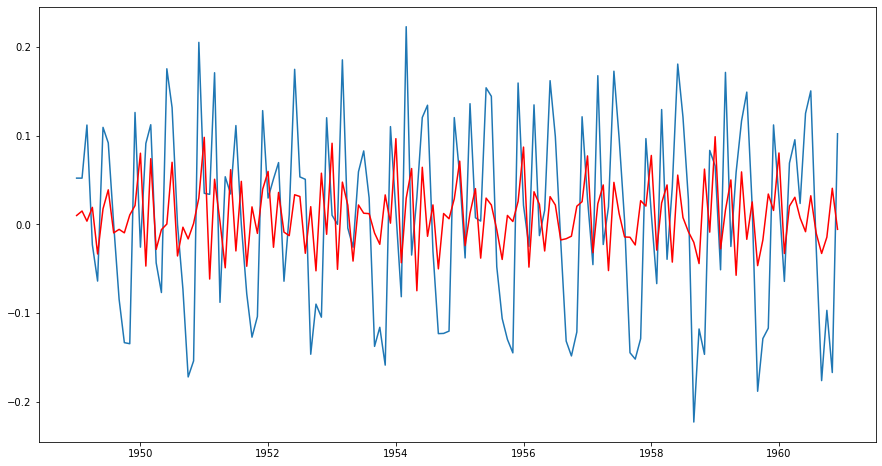

In [31]:
MA_model = ARIMA(data_diff, order=(0,0,2))
MA_model_results = MA_model.fit()
plt.plot(data_diff)
plt.plot(MA_model_results.fittedvalues, color='red')

C:\Users\elitebook 840\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


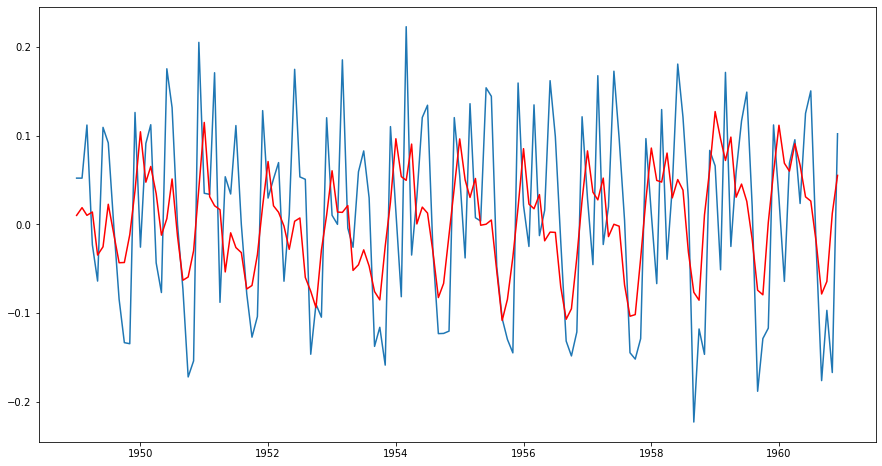

In [32]:
ARIMA_model = ARIMA(data_diff, order=(2,0,1))
ARIMA_model_results = ARIMA_model.fit()
plt.plot(data_diff)
plt.plot(ARIMA_model_results.fittedvalues, color='red')

In [33]:
from fbprophet import Prophet

In [34]:
data = pd.read_csv(r'C:\\Users\\elitebook 840\\Desktop\\airline-passengers.txt')

In [35]:
data['Month'] = pd.to_datetime(data['Month'])
data = data.rename(columns={"Month": "ds", "Passengers": "y"})
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [36]:
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,1949-01-01,84.378677,54.293297,112.186670,106.320611,106.320611,106.320611
1,1949-02-01,77.786826,49.400420,103.868320,108.500995,108.500995,108.500995
2,1949-03-01,109.994541,81.238876,137.216061,110.470374,110.470374,110.470374
3,1949-04-01,107.446903,80.330210,135.920148,112.650758,112.650758,112.650758
4,1949-05-01,110.934953,83.514450,140.062705,114.760808,114.760808,114.760808
...,...,...,...,...,...,...,...
149,1961-05-31,534.202252,504.520281,561.312484,502.729502,502.583298,502.868498
150,1961-06-30,577.287320,548.818520,607.091071,505.744475,505.555737,505.941211
151,1961-07-31,575.709053,547.459003,604.193105,508.859947,508.623530,509.100818
152,1961-08-31,529.206760,499.004196,555.638743,511.975419,511.671511,512.282246


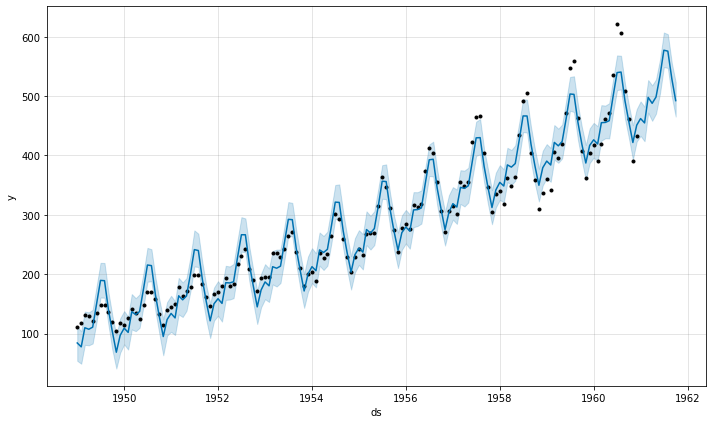

In [38]:
model.plot(forecast)
plt.show()

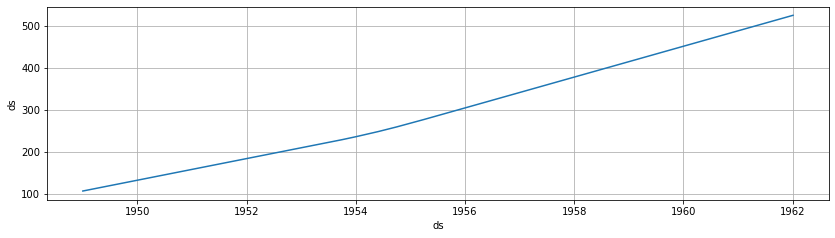

In [39]:
future = model.make_future_dataframe(periods = 398, freq='D')
forecast = model.predict(future)
daily_plot = forecast[174:][['ds', 'yearly', 'trend']]
plt.figure(figsize=(14, 8))
plt.subplots_adjust(hspace=0.25)


ax = plt.subplot(211)
ax.plot(forecast['ds'], forecast['trend'])
ax.set_xlabel('ds')
ax.set_ylabel('ds')
ax.grid()

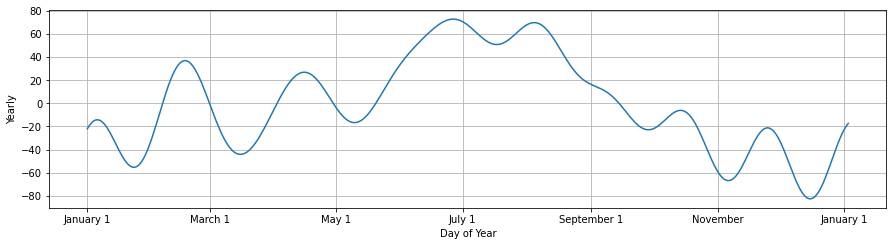

In [40]:
ax1 = plt.subplot(211)
ax1.plot(daily_plot['ds'], daily_plot['yearly'])
ax1.set_xticklabels(['January 1', 'March 1', 'May 1', 'July 1', 'September 1', 'November', 'January 1'])
ax1.set_xlabel('Day of Year')
ax1.set_ylabel('Yearly')
ax1.grid()